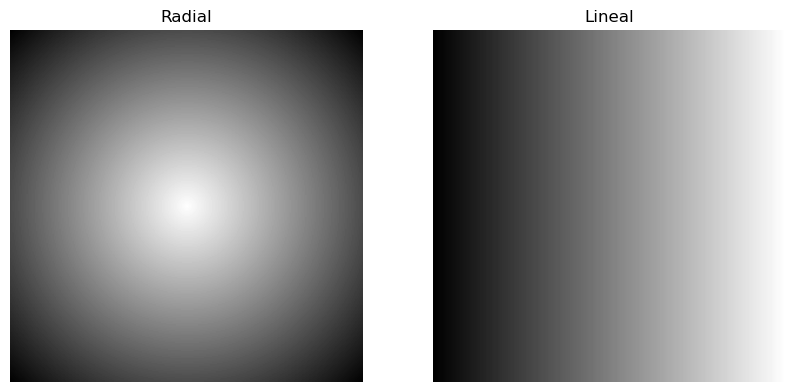

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img2 = np.random.randint(0, 256, (300, 300), dtype=np.uint8)

center_x, center_y = 150, 150

radial_gradient = np.zeros((300, 300), dtype=np.uint8)
for y in range(300):
    for x in range(300):
        distance_to_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
        radial_gradient[y, x] = int(255 * (1 - distance_to_center / np.sqrt(2 * (300 ** 2))))

linear_gradient = np.zeros((300, 300), dtype=np.uint8)
for x in range(300):
    linear_gradient[:, x] = int(255 * x / 300)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(radial_gradient, cmap='gray')
plt.title('Radial')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(linear_gradient, cmap='gray')
plt.title('Lineal')
plt.axis('off')

plt.show()

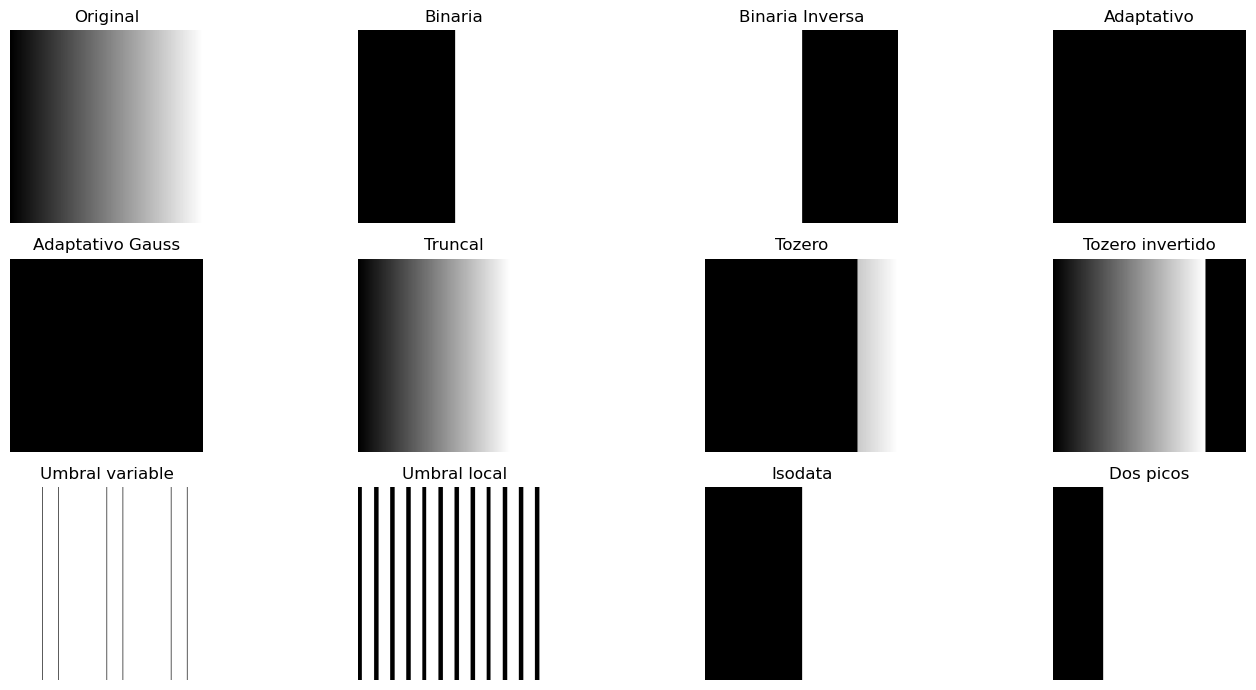

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def met_umb_binaria(img):
    _, umbral_bi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return umbral_bi

def met_umb_binaria_inv(img):
    _, umbral_inv_bi = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    return umbral_inv_bi

def met_umb_adap(img):
    umb_adap = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 25)
    return umb_adap

def met_umb_adap_gauss(img):
    umb_adap_gauss = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)
    return umb_adap_gauss

def met_umb_trunc(img):
    _, umb_trunc = cv2.threshold(img, 200, 255, cv2.THRESH_TRUNC)
    return umb_trunc

def met_umb_tozero(img):
    _, umb_tozero = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO)
    return umb_tozero

def met_umb_tozero_inv(img):
    _, umb_tozero_inv = cv2.threshold(img, 200, 255, cv2.THRESH_TOZERO_INV)
    return umb_tozero_inv

def met_umb_variable(img):
    threshold_image = variable_threshold(img, 25, 10)
    return threshold_image

def met_umb_local(img):
    threshold_image = local_threshold(img, 25, 0.8)
    return threshold_image

def met_umb_isodata(img):
    umbral_isodata = isodata(img)
    _, umbralizada = cv2.threshold(img, umbral_isodata, 255, cv2.THRESH_BINARY)
    return umbralizada

def met_umb_dos_picos(image):
    umbral = dos_picos(image)
    umbralizada = np.where(image < umbral, 0, 255).astype(np.uint8)
    return umbralizada

def variable_threshold(image, block_size, c):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            threshold = block_mean - c
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image

def local_threshold(image, block_size, threshold_offset):
    threshold_image = np.zeros_like(image)
    for y in range(0, image.shape[0], block_size):
        for x in range(0, image.shape[1], block_size):
            block = image[y:y+block_size, x:x+block_size]
            block_mean = np.mean(block)
            block_std = np.std(block)
            threshold = block_mean - (threshold_offset * block_std)
            threshold_image[y:y+block_size, x:x+block_size] = (block > threshold) * 255
    return threshold_image

def isodata(image):
    threshold = 128
    while True:
        groupo1 = image[image <= threshold]
        groupo2 = image[image > threshold]
        media1 = np.mean(groupo1)
        media2 = np.mean(groupo2)
        nuevo_umbral = (media1 + media2) / 2
        if abs(nuevo_umbral - threshold) < 0.5:
            break
        threshold = nuevo_umbral
    return threshold

def dos_picos(image):
    # Calculamos el histograma de la imagen
    hist = cv2.calcHist([image],[0],None,[256],[0,256])# EN ESTE CASO SI O SO HACEMOS USO DEL HISTOGRAMA
    
    # Encontramos los dos picos en el histograma
    pico = np.array(hist)# almacenamos los picos en un array 
    pico = pico.flatten()#aplana el array a una dimension
    pico_diff = np.diff(pico)#buscamos diferencias entre los datos
    primer_pico = np.argmax(pico_diff[:128]) # buscamos el pico hasta 127
    segundo_pico = np.argmax(pico_diff[128:]) + 128 # buscamos el pico desde 128 para adelante 
    
    # El umbral se toma como el promedio de los dos picos
    umbral = int((primer_pico + segundo_pico) / 2)
    
    return umbral

plt.figure(figsize=(15, 7))

plt.subplot(3, 4, 1)
plt.imshow(linear_gradient, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(3, 4, 2)
plt.imshow(met_umb_binaria(linear_gradient), cmap='gray')
plt.title('Binaria')
plt.axis('off')

plt.subplot(3, 4, 3)
plt.imshow(met_umb_binaria_inv(linear_gradient), cmap='gray')
plt.title('Binaria Inversa')
plt.axis('off')

plt.subplot(3, 4, 4)
plt.imshow(met_umb_adap(linear_gradient), cmap='gray')
plt.title('Adaptativo')
plt.axis('off')

plt.subplot(3, 4, 5)
plt.imshow(met_umb_adap_gauss(linear_gradient), cmap='gray')
plt.title('Adaptativo Gauss')
plt.axis('off')

plt.subplot(3, 4, 6)
plt.imshow(met_umb_trunc(linear_gradient), cmap='gray')
plt.title('Truncal')
plt.axis('off')

plt.subplot(3, 4, 7)
plt.imshow(met_umb_tozero(linear_gradient), cmap='gray')
plt.title('Tozero')
plt.axis('off')

plt.subplot(3, 4, 8)
plt.imshow(met_umb_tozero_inv(linear_gradient), cmap='gray')
plt.title('Tozero invertido')
plt.axis('off')

plt.subplot(3, 4, 9)
plt.imshow(met_umb_variable(linear_gradient), cmap='gray')
plt.title('Umbral variable')
plt.axis('off')

plt.subplot(3, 4, 10)
plt.imshow(met_umb_local(linear_gradient), cmap='gray')
plt.title('Umbral local')
plt.axis('off')

plt.subplot(3, 4, 11)
plt.imshow(met_umb_isodata(linear_gradient), cmap='gray')
plt.title('Isodata')
plt.axis('off')

plt.subplot(3, 4, 12)
plt.imshow(met_umb_dos_picos(linear_gradient), cmap='gray')
plt.title('Dos picos')
plt.axis('off')

plt.tight_layout()
plt.show()

